# Bootstrapping: Una Introducción Práctica

## Introducción

**Bootstrapping** es un método estadístico que utiliza el muestreo con reemplazo para estimar la distribución de una estadística (como la media, mediana o desviación estándar) a partir de un conjunto de datos. Es especialmente útil cuando no se puede asumir una distribución específica de los datos o cuando el tamaño de la muestra es pequeño.

---

## Concepto Fundamental

El proceso de bootstrapping consiste en:

1. Generar múltiples muestras (subconjuntos) de los datos originales, seleccionando aleatoriamente con reemplazo.
2. Calcular una estadística específica (media, mediana, etc.) en cada muestra.
3. Usar la distribución de las estadísticas obtenidas para estimar intervalos de confianza o la variabilidad de la métrica.

### Ejemplo Intuitivo:
Supongamos que tienes un grupo de 10 personas con sus respectivas alturas y deseas estimar el intervalo de confianza para la media de la altura. En lugar de recopilar más datos, puedes crear nuevas muestras a partir de los datos existentes.

---

## Método de Feynman

**¿Qué es bootstrapping en palabras simples?**

Imagina que tienes una bolsa con 10 canicas de diferentes colores (los datos originales). Tomas canicas al azar, las anotas y las devuelves a la bolsa (muestreo con reemplazo). Repites esto varias veces para crear nuevas bolsas (muestras) y calculas el promedio de colores para cada bolsa. Al final, analizas estos promedios para entender mejor las propiedades de la bolsa original.

---

## Aplicación Práctica en Estadística

1. **Estimación de parámetros**:
   - Estimar la media, la varianza o cualquier otra métrica estadística.
2. **Construcción de intervalos de confianza**:
   - Determinar la incertidumbre asociada a una estimación.
3. **Validación de modelos**:
   - Evaluar la estabilidad de los modelos al variar los datos.

---

## Desventajas y Limitaciones

- **Cálculo intensivo**:
  Bootstrapping puede ser computacionalmente costoso, especialmente con grandes conjuntos de datos.
- **Dependencia de la muestra original**:
  Si los datos originales son sesgados, las muestras bootstrap también lo serán.

---

## Fórmula Matemática

Sea $ D = \{x_1, x_2, \dots, x_n\} $ el conjunto de datos original con $ n $ observaciones.

1. Genera $ B $ muestras bootstrap $ D_1^*, D_2^*, \dots, D_B^* $, cada una de tamaño $ n $, seleccionadas con reemplazo de $ D $.
2. Calcula la estadística $ \theta^* $ (como la media) para cada muestra:
   $$
   \theta^*_b = f(D_b^*) \quad \text{para } b = 1, 2, \dots, B
   $$
3. Usa los valores $ \{\theta^*_1, \theta^*_2, \dots, \theta^*_B\} $ para estimar:
   - Media bootstrap:
     $$
     \hat{\theta} = \frac{1}{B} \sum_{b=1}^B \theta^*_b
     $$
   - Intervalos de confianza:
     Usando los percentiles de la distribución bootstrap.

---

## Comparación con Otros Métodos

| **Método**         | **Ventaja**                                       | **Desventaja**                                |
|---------------------|---------------------------------------------------|-----------------------------------------------|
| **Bootstrapping**   | No requiere suposiciones sobre la distribución.   | Computacionalmente intensivo.                 |
| **Teoría clásica**  | Más rápida y menos costosa.                       | Requiere suponer distribuciones normales.     |
| **Jackknife**       | Útil para pequeños conjuntos de datos.            | Puede ser menos preciso que el bootstrapping. |

---

## Ejemplo Práctico en Python

Intervalo de confianza del 95% para la media: (164.0, 176.0)


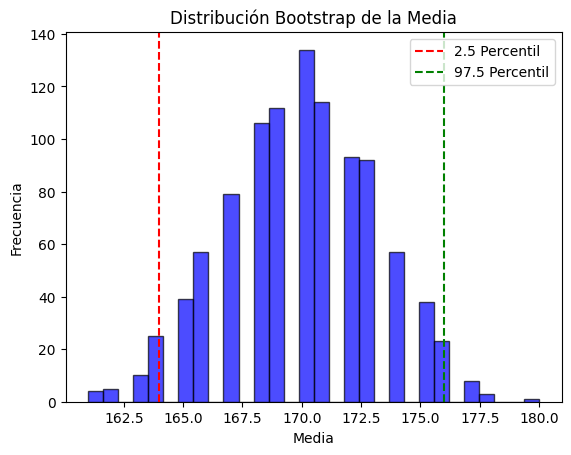

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales: Alturas de ejemplo (en cm)
data = np.array([160, 165, 170, 175, 180])

# Función para realizar el bootstrapping
def bootstrap(data, num_samples=1000, stat_function=np.mean):
    bootstrap_samples = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)  # Muestreo con reemplazo
        bootstrap_samples.append(stat_function(sample))
    return np.array(bootstrap_samples)

# Realizar bootstrapping para estimar la media
bootstrap_means = bootstrap(data)

# Calcular intervalo de confianza del 95%
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print("Intervalo de confianza del 95% para la media:", (lower_bound, upper_bound))

# Visualizar la distribución bootstrap
plt.hist(bootstrap_means, bins=30, alpha=0.7, color="blue", edgecolor="black")
plt.axvline(lower_bound, color="red", linestyle="--", label="2.5 Percentil")
plt.axvline(upper_bound, color="green", linestyle="--", label="97.5 Percentil")
plt.title("Distribución Bootstrap de la Media")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [1]:

lista1 = [1, 2, 3, 'a', [1,2,3]]

lista1.append(100)
lista1


[1, 2, 3, 'a', [1, 2, 3], 100]